In [1]:
import os 
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
os.getcwd() #same as pwd command

'/workspace/AI_Data_Science/Data-science/ml-algorithms'

In [3]:
df = pd.read_csv('ToyotaCorolla.csv')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
# check data number and variable numbers
nCar = df.shape[0]
nVar = df.shape[1]
print(nCar, nVar)

1436 37


In [5]:
# convert categorical type variable into binary type variable 
df.Fuel_Type.unique()
dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

In [6]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
# substitute after index slicing
p_idx = np.array(df.Fuel_Type == 'Petrol')
d_idx = np.array(df.Fuel_Type == 'Diesel')
c_idx = np.array(df.Fuel_Type == 'CNG')

In [8]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [9]:
dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

In [10]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

### add dummy variable and delete unnecessary variables

In [11]:
fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG':dummy_c})

In [12]:
fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [13]:
df_ = df.drop(['Id', 'Model', 'Fuel_Type'], axis=1, inplace=False)
mir_data = pd.concat((df_, fuel), 1)
mir_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [14]:
mir_data.columns.difference(['Price'])

Index(['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic',
       'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider',
       'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders',
       'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color',
       'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps',
       'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio',
       'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc'],
      dtype='object')

In [15]:
# add bias
mir_data2 = sm.add_constant(mir_data, has_constant='add')
mir_data2 

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1.0,7500,69,12,1998,20544,86,1,0,1300,...,0,1,1,1,0,0,0,1,0,0
1432,1.0,10845,72,9,1998,19000,86,0,0,1300,...,0,0,1,1,0,0,0,1,0,0
1433,1.0,8500,71,10,1998,17016,86,0,0,1300,...,0,0,0,1,0,0,0,1,0,0
1434,1.0,7250,70,11,1998,16916,86,1,0,1300,...,0,0,0,1,0,0,0,1,0,0


### X, Y (target variable) split into train and validation data

In [16]:
feature_columns = list(mir_data.columns.difference(['Price']))

X = mir_data[feature_columns]
y = mir_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size = 0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 36) (431, 36) (1005,) (431,)


In [17]:
# train the MLR / fit regression mode
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [18]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     332.9
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:56:54   Log-Likelihood:                -8414.7
No. Observations:                1005   AIC:                         1.690e+04
Df Residuals:                     971   BIC:                         1.706e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -296.9775    136.225     -2.180      0.029    -564.308     -29.647
Age_08_04         -115.2684      3.983    -28.941      0.000    -123.084    -107.452
Airbag_1           -25.7064    250.306     -0.103      0.918    -516.910     465.497
Airbag_2           126.0322    140.018      0.900      0.368    -148.741     400.805
Airco              200.3820     92.088      2.176      0.030      19.668     381.096
Automatic           26.7169    161.068      0.166      0.868    -289.365     342.798
Automatic_airco   2211.5883    200.649     11.022      0.000    1817.833    2605.343
BOVAG_Guarantee    618.3177    137.974      4.481      0.000     347.556     889.080
Backseat_Divider  -248.6999    135.223     -1.839      0.066    -514.063      16.663
Boardcomputer     -330.6343    118.922     -2.780      0.006    -564.008     -97.261
CD_Player          260.5198    101.547      2.566      0.010      61.243     459.797
CNG               -412.3014    248.457     -1.659      0.097    -899.877      75.274
Central_Lock        -8.6876    143.454     -0.061      0.952    -290.204     272.829
Cylinders           -0.0429      0.002    -17.196      0.000      -0.048      -0.038
Diesel            -938.7762    212.910     -4.409      0.000   -1356.592    -520.960
Doors              -82.5897     44.185     -1.869      0.062    -169.298       4.119
Gears              141.4020    203.432      0.695      0.487    -257.815     540.619
Guarantee_Period    77.5373     13.800      5.619      0.000      50.456     104.618
HP                   4.6339      3.920      1.182      0.237      -3.059      12.327
KM                  -0.0144      0.001    -11.055      0.000      -0.017      -0.012
Met_Color           29.2133     77.097      0.379      0.705    -122.083     180.510
Metallic_Rim       146.8079     94.365      1.556      0.120     -38.375     331.990
Mfg_Month          -87.2746     10.510     -8.304      0.000    -107.900     -66.649
Mfg_Year            -4.6384      1.037     -4.473      0.000      -6.673      -2.604
Mfr_Guarantee      254.1340     74.613      3.406      0.001     107.712     400.556
Mistlamps         -153.5885    113.842     -1.349      0.178    -376.993      69.816
Petrol            1351.0668    209.180      6.459      0.000     940.570    1761.564
Power_Steering    -156.7888    282.252     -0.555      0.579    -710.684     397.106
Powered_Windows    285.0703    142.954      1.994      0.046       4.536     565.604
Quarterly_Tax        9.5205      1.960      4.857      0.000       5.674      13.367
Radio              727.7527    632.612      1.150      0.250    -513.692    1969.197
Radio_cassette    -880.0533    633.579     -1.389      0.165   -2123.395     363.288
Sport_Model         85.3481     92.304      0.925      0.355     -95.790     266.486
Tow_Bar           -276.

### check VIF multicorrelation

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
# x_data4 = x_data3.drop('RM', axis=1)
vif['VIF Factor'] = [variance_inflation_factor(
    mir_data.values, i) for i in range(mir_data.shape[1])]
vif['features'] = mir_data.columns
vif

/usr/local/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,10.953474,Price
1,inf,Age_08_04
2,inf,Mfg_Month
3,inf,Mfg_Year
4,2.400334,KM
5,2.621514,HP
6,1.143778,Met_Color
7,1.121303,Automatic
8,1.258641,cc
9,1.352288,Doors


In [20]:
#check training data
res = fitted_full_model.resid

fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

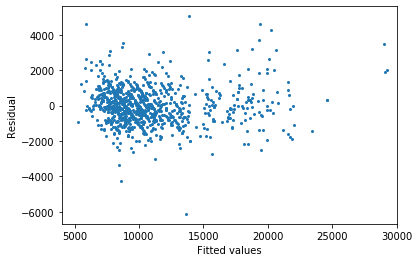

In [21]:
# residual pattern check
pred_y = fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y, res, s=4)
plt.xlim(4000, 30000)
plt.xlim(4000, 30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [22]:
# predict validation data
pred_y2 = fitted_full_model.predict(test_x)

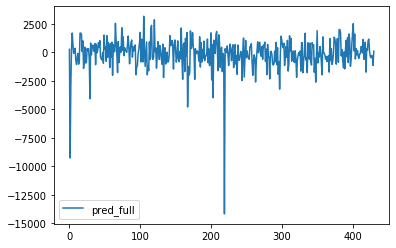

In [23]:
## residual plot
plt.plot(np.array(test_y-pred_y2), label='pred_full')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
## MSE performance
mean_squared_error(y_true=test_y, y_pred = pred_y2)

1823252.3703167385

### variable selection method

In [26]:
def processSubset(X, y , feature_set) :
    model = sm.OLS(y, X[list(feature_set)]) # modeling
    regr = model.fit() # train model
    AIC = regr.aic # aic of model
    return {'model': regr, 'AIC':AIC}

print(processSubset(X=train_x, y = train_y, feature_set=feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f063f639f50>, 'AIC': 19170.024587117674}


In [27]:
processSubset(X=train_x, y = train_y, feature_set=feature_columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f063fb08110>,
 'AIC': 16897.493019452515}

In [28]:
import time
import itertools

In [29]:
import time
import itertools
# getBest: select and save the model that has most lowest aic
def getBest(X, y, k):
    tic = time.time() # starting time
    results = [] # for saving the result
    for combo in itertools.combinations(X.columns.difference(['const']), k):
        c = (list(combo))
        
        results.append(processSubset(X, y, feature_set=c)) #save the modeled result
    models = pd.DataFrame(results) # change to dataframe
    # select and save the model that has most lowest aic
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # end time
    print('Processed ', models.shape[0], 'models on', k, 'predictors in', toc-tic, 'seconds.')
    return best_model



In [30]:
print(getBest(X=train_x, y=train_y, k=2))

Processed  630 models on 2 predictors in 5.169468879699707 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17644.4
Name: 67, dtype: object


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  del sys.path[0]


In [31]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
        print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

['Mfg_Year', 'cc', 'const']
['Mfr_Guarantee', 'Mistlamps', 'const']
['Mfr_Guarantee', 'Petrol', 'const']
['Mfr_Guarantee', 'Power_Steering', 'const']
['Mfr_Guarantee', 'Powered_Windows', 'const']
['Mfr_Guarantee', 'Quarterly_Tax', 'const']
['Mfr_Guarantee', 'Radio', 'const']
['Mfr_Guarantee', 'Radio_cassette', 'const']
['Mfr_Guarantee', 'Sport_Model', 'const']
['Mfr_Guarantee', 'Tow_Bar', 'const']
['Mfr_Guarantee', 'Weight', 'const']
['Mfr_Guarantee', 'cc', 'const']
['Mistlamps', 'Petrol', 'const']
['Mistlamps', 'Power_Steering', 'const']
['Mistlamps', 'Powered_Windows', 'const']
['Mistlamps', 'Quarterly_Tax', 'const']
['Mistlamps', 'Radio', 'const']
['Mistlamps', 'Radio_cassette', 'const']
['Mistlamps', 'Sport_Model', 'const']
['Mistlamps', 'Tow_Bar', 'const']
['Mistlamps', 'Weight', 'const']
['Mistlamps', 'cc', 'const']
['Petrol', 'Power_Steering', 'const']
['Petrol', 'Powered_Windows', 'const']
['Petrol', 'Quarterly_Tax', 'const']
['Petrol', 'Radio', 'const']
['Petrol', 'Radio_casse

In [32]:
models = pd.DataFrame(columns=['AIC', 'model'])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x, y=train_y, k=i)
toc = time.time()
print('total elapsed time: ', (toc-tic), 'seconds.')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  del sys.path[0]


Processed  36 models on 1 predictors in 0.4884185791015625 seconds.
Processed  630 models on 2 predictors in 5.354277849197388 seconds.
Processed  7140 models on 3 predictors in 73.02254438400269 seconds.
total elapsed time:  79.22409343719482 seconds.


In [33]:
models

,AIC,model
1,19181.442574,<statsmodels.regression.linear_model.Regressio...
2,17644.434159,<statsmodels.regression.linear_model.Regressio...
3,17384.099331,<statsmodels.regression.linear_model.Regressio...


In [34]:
models.loc[3, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          2.242e+04
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                        0.00
Time:                        12:58:27   Log-Likelihood:                         -8689.0
No. Observations:                1005   AIC:                                  1.738e+04
Df Residuals:                    1002   BIC:                                  1.740e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -126.5088      2.518    -50.242      0.000    -131.450    -121.568
KM            -0.0234      0.001    -17.288      0.000      -0.026      -0.021
Weight        18.1313      0.121    150.174      0.000      17.894      18.368
==============================================================================
Omnibus:                      118.330   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              855.268
Skew:                           0.245   Prob(JB):                    1.91e-186
Kurtosis:                       7.493   Cond. No.                     4.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# compare all variable models
print("full modle rsquared: ", "{:.5f}".format(fitted_full_model.rsquared))
print('full modle AIC: ', "{:.5f}".format(fitted_full_model.aic))
print('selected model Rsquared: ', "{:.5f}".format(models.loc[3, 'model'].rsquared))
print('selected model AIC: ', "{:.5f}".format(models.loc[3, 'model'].aic))

full modle rsquared:  0.91878
full modle AIC:  16897.49302
selected model Rsquared:  0.98532
selected model AIC:  17384.09933


### forward selection method

In [39]:
def forward(X, y, predictors):
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y=y, feature_set=predictors+[p]))
    #change to dataframe
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print('processed ', models.shape[0], 'models on', len(predictors)+1, 'predictors in', (toc-tic))
    print('selected predictors: ', best_model['model'].model.exog_names, 'AIC: ', best_model[0])
    return best_model

In [40]:
def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # data variable 
    predictors = []
    # variable 1-10 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [41]:
Forward_best_model = forward_model(X=train_x, y= train_y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  # Remove the CWD from sys.path while we load stuff.


processed  36 models on 1 predictors in 0.2065889835357666
selected predictors:  ['Weight'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f063ed6d090>
processed  35 models on 2 predictors in 0.19908571243286133
selected predictors:  ['Weight', 'Age_08_04'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f063ed6d3d0>
processed  34 models on 3 predictors in 0.2047889232635498
selected predictors:  ['Weight', 'Age_08_04', 'KM'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f063ec87f50>
processed  33 models on 4 predictors in 0.20119881629943848
selected predictors:  ['Weight', 'Age_08_04', 'KM', 'Automatic_airco'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f063ed77910>
processed  32 models on 5 predictors in 0.30855607986450195
selected predictors:  ['Weight', 'Age_08_04', 'KM', 'Automatic_airco', 'Mfg_Month'] AIC:  <statsmodels.regression.linear_mod

processed  12 models on 25 predictors in 0.7714147567749023
selected predictors:  ['Weight', 'Age_08_04', 'KM', 'Automatic_airco', 'Mfg_Month', 'HP', 'Powered_Windows', 'Guarantee_Period', 'BOVAG_Guarantee', 'Mfr_Guarantee', 'Cylinders', 'Petrol', 'Quarterly_Tax', 'Tow_Bar', 'CD_Player', 'Boardcomputer', 'ABS', 'Doors', 'Airco', 'cc', 'Backseat_Divider', 'Radio_cassette', 'Sport_Model', 'Metallic_Rim', 'Mfg_Year'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f063ed92090>
processed  11 models on 26 predictors in 0.5930485725402832
selected predictors:  ['Weight', 'Age_08_04', 'KM', 'Automatic_airco', 'Mfg_Month', 'HP', 'Powered_Windows', 'Guarantee_Period', 'BOVAG_Guarantee', 'Mfr_Guarantee', 'Cylinders', 'Petrol', 'Quarterly_Tax', 'Tow_Bar', 'CD_Player', 'Boardcomputer', 'ABS', 'Doors', 'Airco', 'cc', 'Backseat_Divider', 'Radio_cassette', 'Sport_Model', 'Metallic_Rim', 'Mfg_Year', 'CNG'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWra

In [42]:
Forward_best_model.aic

16883.555132495952

In [43]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     479.3
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:16:21   Log-Likelihood:                -8417.8
No. Observations:                1005   AIC:                         1.688e+04
Df Residuals:                     981   BIC:                         1.700e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Weight              21.8248      1.553     14.057      0.000      18.778      24.872
Age_08_04         -116.9074      3.817    -30.626      0.000    -124.398    -109.416
KM                  -0.0146      0.001    -11.318      0.000      -0.017      -0.012
Automatic_airco   2130.5569    188.996     11.273      0.000    1759.673    2501.441
Mfg_Month          -86.3175     10.392     -8.306      0.000    -106.710     -65.925
HP                   7.3648      3.367      2.187      0.029       0.757      13.973
Powered_Windows    239.6816     84.998      2.820      0.005      72.883     406.480
Guarantee_Period    74.7792     13.531      5.526      0.000      48.225     101.333
BOVAG_Guarantee    603.4301    135.631      4.449      0.000     337.270     869.591
Mfr_Guarantee      257.2508     73.263      3.511      0.000     113.480     401.021
Cylinders           -0.0421      0.002    -18.966      0.000      -0.047      -0.038
Petrol            2115.5297    296.273      7.140      0.000    1534.128    2696.931
Quarterly_Tax       10.0093      1.876      5.337      0.000       6.329      13.690
Tow_Bar           -263.9184     79.612     -3.315      0.001    -420.148    -107.689
CD_Player          279.8160     99.409      2.815      0.005      84.737     474.895
Boardcomputer     -338.0046    118.237     -2.859      0.004    -570.030    -105.979
ABS               -264.9941    102.011     -2.598      0.010    -465.179     -64.810
Doors              -79.0855     42.208     -1.874      0.061    -161.913       3.742
Airco              178.7224     87.200      2.050      0.041       7.602     349.842
cc                  -0.1250      0.074     -1.687      0.092      -0.270       0.020
Backseat_Divider  -264.7238    120.617     -2.195      0.028    -501.421     -28.027
Radio_cassette    -163.5197    101.182     -1.616      0.106    -362.077      35.038
Sport_Model        141.3340     87.102      1.623      0.105     -29.593     312.261
Metallic_Rim       125.9037     87.947      1.432      0.153     -46.682     298.489
Mfg_Year            -4.1885      0.832     -5.033      0.000      -5.822      -2.555
==============================================================================
Omnibus:                       92.124   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              370.789
Skew:                           0.341   Prob(JB):                     3.05e-81
Kurtosis:                       5.897   Cond. No.                     3.71e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.38e-27. This might indicate that there are
strong multicollinearity problems or that the desi

### method of backward elimination

In [47]:
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # predictors combination
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)))
    models = pd.DataFrame(results)
    # choose the lowest AIC model
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [48]:
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [49]:
Backward_best_model = backward_model(X=train_x,y=train_y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  if __name__ == '__main__':


Processed  36 models on 35 predictors in 2.3781638145446777
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f063eda4210>
Processed  35 models on 34 predictors in 1.8080482482910156
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee'

In [50]:
Backward_best_model.aic

16883.956396285506

In [51]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     459.7
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:23:12   Log-Likelihood:                -8417.0
No. Observations:                1005   AIC:                         1.688e+04
Df Residuals:                     980   BIC:                         1.701e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -253.4634    102.399     -2.475      0.013    -454.409     -52.518
Airco              177.6539     87.179      2.038      0.042       6.574     348.733
Automatic_airco   2121.9138    189.069     11.223      0.000    1750.887    2492.941
BOVAG_Guarantee    602.5693    135.594      4.444      0.000     336.481     868.658
Backseat_Divider  -257.1166    120.736     -2.130      0.033    -494.048     -20.185
Boardcomputer     -334.5664    118.235     -2.830      0.005    -566.589    -102.544
CD_Player          272.4093     99.558      2.736      0.006      77.038     467.780
CNG               -5.76e+04   1914.528    -30.088      0.000   -6.14e+04   -5.38e+04
Cylinders        -6.861e+05   2.26e+04    -30.400      0.000    -7.3e+05   -6.42e+05
Diesel           -5.811e+04   1874.954    -30.992      0.000   -6.18e+04   -5.44e+04
Doors              -88.1918     42.821     -2.060      0.040    -172.223      -4.161
Guarantee_Period    75.6110     13.544      5.583      0.000      49.032     102.189
HP                   5.3448      3.735      1.431      0.153      -1.984      12.674
KM                  -0.0145      0.001    -11.206      0.000      -0.017      -0.012
Metallic_Rim       123.0032     87.952      1.399      0.162     -49.594     295.600
Mfg_Month           30.5342     10.457      2.920      0.004      10.013      51.055
Mfg_Year          1393.3628     46.308     30.089      0.000    1302.488    1484.237
Mfr_Guarantee      256.3524     73.246      3.500      0.000     112.616     400.089
Petrol           -5.582e+04   1890.637    -29.525      0.000   -5.95e+04   -5.21e+04
Powered_Windows    234.0135     85.095      2.750      0.006      67.025     401.002
Quarterly_Tax       10.0078      1.875      5.338      0.000       6.328      13.687
Radio_cassette    -160.3798    101.184     -1.585      0.113    -358.942      38.182
Sport_Model        127.4423     87.784      1.452      0.147     -44.824     299.709
Tow_Bar           -266.6701     79.620     -3.349      0.001    -422.915    -110.425
Weight              22.6741      1.695     13.381      0.000      19.349      25.999
cc                  -0.1171      0.074     -1.575      0.116      -0.263       0.029
==============================================================================
Omnibus:                       92.855   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.555
Skew:                           0.344   Prob(JB):                     4.64e-82
Kurtosis:                       5.910   Cond. No.                     1.31e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.52e-20. 

### mothod of step selection

In [64]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors + ['const'])['AIC']
    # variable 1~10: 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [65]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

KeyError: "None of [Index(['const'], dtype='object')] are in the [columns]"

In [66]:
Stepwise_best_model.aic

NameError: name 'Stepwise_best_model' is not defined

In [68]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape)

(25,) (26,)
